# 1. Introduction - Call Cleaned Data from Github

In [38]:
import pandas as pd
import numpy as np
# import requests
# from bs4 import BeautifulSoup
from datetime import datetime
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

path = movies_url = "https://raw.githubusercontent.com/wolframbler/dsClass/master/clean_data.csv"
movie_df = pd.read_csv(path)
# print(movie_df)
movie_df.head()
# np.shape(movie_df)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
3,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
4,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


In [39]:
movie_df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

# 2. Variable Recoding

## i. Genre Recoding

In [40]:
# Parse out individual genres from grouped genres in each row
genre_array = [genre_list.split("|") for genre_list in movie_df['genres']]
distinct_genres = {genre.strip() for genres in genre_array for genre in genres}
distinct_genres.discard('')

# Display individual genres
distinct_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [41]:
# Assign 0s to each individual genre
for genre in sorted(distinct_genres):
    movie_df[genre] = np.zeros(len(movie_df), dtype=int)
    
pd.set_option("display.max_columns", 150)
movie_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
# Assign the applicable genres with 1s
for idx, row in movie_df.iterrows():
    for genre in row['genres'].split("|"):
        if genre != '':
            movie_df.loc[idx, genre] = 1
movie_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [43]:
print(len(movie_df.director_name.unique()))
print((movie_df.director_name.value_counts() >= 2).value_counts()[1])

1096
458


## ii. Actor Recoding

In [48]:
actors_1 = movie_df['actor_1_name']
actors_2 = movie_df['actor_2_name']
actors_3 = movie_df['actor_3_name']

all_actors_series = pd.concat([actors_1, actors_2, actors_3])
set(all_actors_series)
actor_array = [actor_list.split("|") for actor_list in all_actors_series]
unique_actor = {actor.strip() for actors in actor_array for actor in actors}
# unique_actor.discard('')
unique_actor

{'Damon Wayans',
 'Olivia Munn',
 'Fred Armisen',
 'Olivia Williams',
 'Pamela Anderson',
 'Rhea Perlman',
 'Oprah Winfrey',
 'Cara Delevingne',
 "La'Princess Jackson",
 "Mike O'Malley",
 'David Threlfall',
 'Shaun Evans',
 'Mark Addy',
 'Michael Biehn',
 'Jason Flemyng',
 'Usher Raymond',
 'Aramis Knight',
 'Monica Calhoun',
 'Adriano Giannini',
 'Nicholas Lea',
 'Sarah Carter',
 'Tom Hulce',
 'Bella Thorne',
 'Caroline Dhavernas',
 'Mike Bell',
 'Ian Somerhalder',
 'Kerr Smith',
 'Mike Starr',
 'Bryan Brown',
 'Tom Guiry',
 'Najarra Townsend',
 'Riley Thomas Stewart',
 'Henry Rollins',
 'Rae Dawn Chong',
 'Miguel Ferrer',
 'Rumer Willis',
 'Leonardo DiCaprio',
 'Donny Boaz',
 'Kyle Gass',
 'Augustus Prew',
 'Paul Scheer',
 'Mo Gallini',
 'Kaitlyn Dever',
 'Brooklynn Proulx',
 'Donald Faison',
 'Christine Lakin',
 'Dan Bilzerian',
 'Jeremy Northam',
 'Candace Kroslak',
 'Jake Cherry',
 'Adam Arkin',
 'Radha Mitchell',
 'Cameron Boyce',
 'Kip Pardue',
 'Daniel Mays',
 'Miranda July',
 

In [51]:
for actor in sorted(unique_actor):
    movie_df[actor] = np.zeros(len(movie_df), dtype=int)

In [52]:
# fill actors with 1's
for idx, row in movie_df.iterrows():
#     actors = [movie_df.loc[idx, "actor_1_name"], movie_df.loc[idx, "actor_2_name"], movie_df.loc[idx, "actor_3_name"]]
#     print(actors)
    for col in ["actor_1_name", "actor_2_name", "actor_2_name"]:#row['Stars_List'].split(",, "):
        actor = movie_df.loc[idx, col]
#         print(actor)
        if actor != '' and actor in unique_actor:
#             print("y")
            movie_df.loc[idx, actor] = 1 
movie_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,50 Cent,A.J. Buckley,AJ Michalka,Aaliyah,Aaron Hughes,Aaron Stanford,Aaron Staton,Aaron Yoo,Aasif Mandvi,Abbie Cornish,Abigail Spencer,Abraham Benrubi,Adam Arkin,Adam Baldwin,Adam Brown,Adam Copeland,Adam Garcia,Adam Goldberg,Adam Hicks,Adam Lamberg,Adam LeFevre,Adam Ratcliffe,Adam Sandler,Adam Scott,Adelaide Kane,Adhir Kalyan,...,Virginie Ledoyen,Vivica A. Fox,Vondie Curtis-Hall,W. Earl Brown,Wade Williams,Walter Masterson,Wanda Sykes,Warren Christie,Wayne Brady,Wayne Knight,Wendell Pierce,Wendi McLendon-Covey,Wendie Malick,Wendy Crewson,Wendy Raquel Robinson,Wes Studi,Wesley Jonathan,Wilford Brimley,Will Beinbrink,Will Estes,Will Ferrell,Will Forte,Will Oldham,Will Patton,Will Smith,Will.i.am,William Abadie,William Atherton,William Baldwin,William Devane,William Hurt,William Mapother,William Morgan Sheppard,William Petersen,William Ragsdale,William Xifaras,Willie Garson,Willie Nelson,Willow Smith,Wilson Cruz,Windell Middlebrooks,Wood Harris,Woody Allen,Xander Berkeley,Xzibit,Yaya DaCosta,Yeardley Smith,Yetta Gottesman,Yuki Matsuzaki,Yuri Lowenthal,Yvette Nicole Brown,Zach Callison,Zach Gilford,Zach McGowan,Zach Mills,Zach Woods,Zachary Gordon,Zachery Ty Bryan,Zack Pearlman,Zack Ward,Zackary Steven Graham,Zahn McClarnon,Zak Orth,Zan Marolt,Zane Holtz,Zayn Malik,Zena Grey,Zoe Kazan,Zoe Levin,Zoey Deutch,Zooey Deschanel,Zoë Bell,Zoë Kravitz,Zoë Poledouris,Óscar Jaenada
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,US

## iii. Color Recoding

In [53]:
def is_color_movie(is_color):
#     print(is_color)
    return 1 if is_color == "Color" else 0


movie_df["is_color"] = movie_df["color"].apply(is_color_movie)
movie_df["roi"] = ""
movie_df["roi"] = (movie_df["gross"] - movie_df["budget"]) / movie_df["budget"]

movie_roi_list = list(movie_df["roi"])

In [54]:
from sklearn.preprocessing import MinMaxScaler

min = 0
max = 1
scaler =  MinMaxScaler(feature_range=(min, max))

cols_to_norm = ["num_critic_for_reviews", "duration", "director_facebook_likes", "actor_1_facebook_likes", "actor_2_facebook_likes", "actor_3_facebook_likes", "gross", "num_voted_users", "cast_total_facebook_likes", "num_user_for_reviews", "movie_facebook_likes", "imdb_score"]

for col in cols_to_norm:
    col_name = col + "_norm"
    movie_df[col_name] = np.zeros(len(movie_df), dtype=int)
    movie_df[col_name] = scaler.fit_transform(movie_df[col].values.reshape(-1, 1))
    movie_df[col_name][:5]

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [55]:
pd.set_option("display.max_rows", 10)
movie_df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,50 Cent,A.J. Buckley,AJ Michalka,Aaliyah,Aaron Hughes,Aaron Stanford,Aaron Staton,Aaron Yoo,Aasif Mandvi,Abbie Cornish,Abigail Spencer,Abraham Benrubi,Adam Arkin,Adam Baldwin,Adam Brown,Adam Copeland,Adam Garcia,Adam Goldberg,Adam Hicks,Adam Lamberg,Adam LeFevre,Adam Ratcliffe,Adam Sandler,Adam Scott,Adelaide Kane,Adhir Kalyan,Adrian Alonso,Adrian Martinez,Adrian Paul,Adriano Giannini,Adrien Dorval,Agnes Bruckner,Ahna O'Reilly,Ahney Her,Aidan Quinn,Aidan Turner,Aimee Garcia,Aimee Teegarden,...,Wendy Raquel Robinson,Wes Studi,Wesley Jonathan,Wilford Brimley,Will Beinbrink,Will Estes,Will Ferrell,Will Forte,Will Oldham,Will Patton,Will Smith,Will.i.am,William Abadie,William Atherton,William Baldwin,William Devane,William Hurt,William Mapother,William Morgan Sheppard,William Petersen,William Ragsdale,William Xifaras,Willie Garson,Willie Nelson,Willow Smith,Wilson Cruz,Windell Middlebrooks,Wood Harris,Woody Allen,Xander Berkeley,Xzibit,Yaya DaCosta,Yeardley Smith,Yetta Gottesman,Yuki Matsuzaki,Yuri Lowenthal,Yvette Nicole Brown,Zach Callison,Zach Gilford,Zach McGowan,Zach Mills,Zach Woods,Zachary Gordon,Zachery Ty Bryan,Zack Pearlman,Zack Ward,Zackary Steven Graham,Zahn McClarnon,Zak Orth,Zan Marolt,Zane Holtz,Zayn Malik,Zena Grey,Zoe Kazan,Zoe Levin,Zoey Deutch,Zooey Deschanel,Zoë Bell,Zoë Kravitz,Zoë Poledouris,Óscar Jaenada,is_color,roi,num_critic_for_reviews_norm,duration_norm,director_facebook_likes_norm,actor_1_facebook_likes_norm,actor_2_facebook_likes_norm,actor_3_facebook_likes_norm,gross_norm,num_voted_users_norm,cast_total_facebook_likes_norm,num_user_for_reviews_norm,movie_facebook_likes_norm,imdb_score_norm
count,2142.000000,2142.000000,2142.000000,2142.000000,2142.00000,2.142000e+03,2.142000e+03,2142.000000,2142.000000,2142.000000,2.142000e+03,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.0,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.0,2142.000000,2142.000000,2142.000000,2142.0,2142.000000,2142.000000,2142.0,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.0,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.0,2142.000000,2142.000000,2142.000000,2142.000000,...,2142.000000,2142.000000,2142.000000,2142.000000,2142.0,2142.000000,2142.000000,2142.000000,2142.0,2142.000000,2142.000000,2142.0,2142.0,2142.000000,2142.000000,2142.0,2142.000000,2142.000000,2142.000000,2142.0,2142.0,2142.000000,2142.0,2142.0,2142.0,2142.000000,2142.000000,2142.0,2142.000000,2142.000000,2142.0,2142.000000,2142.000000,2142.0,2142.000000,2142.000000,2142.0,2142.000000,2142.000000,2142.0,2142.0,2142.0,2142.000000,2142.000000,2142.0,2142.000000,2142.000000,2142.0,2142.0,2142.000000,2142.000000,2142.000000,2142.0,2142.000000,2142.0,2142.000000,2142.000000,2142.0,2142.000000,2142.0,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000
mean,196.373950,108.070962,784.199346,963.302521,9004.90056,6.013719e+07,1.116270e+05,13590.473389,1.500000,360.026611,4.599717e+07,2007.529412,2462.442110,6.297246,2.137446,11957.893091,0.246965,0.210084,0.064893,0.052288,0.429972,0.178338,0.014939,0.4

# 3. Modeling

## i. Linear Regression

In [188]:
from sklearn import linear_model
# build a model
linear = linear_model.Lasso(alpha=0.01)
movie_df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres',
       ...
       'director_facebook_likes_norm', 'actor_1_facebook_likes_norm',
       'actor_2_facebook_likes_norm', 'actor_3_facebook_likes_norm',
       'gross_norm', 'num_voted_users_norm', 'cast_total_facebook_likes_norm',
       'num_user_for_reviews_norm', 'movie_facebook_likes_norm',
       'imdb_score_norm'],
      dtype='object', length=2805)

In [189]:
cols_to_remove = ["title_year", "roi", "color", "director_name", "actor_1_name", "actor_2_name", "actor_3_name", "genres", "movie_title", "gross", "budget", "plot_keywords", "movie_imdb_link", "language", "country", "content_rating", "aspect_ratio"]
cols_to_remove += cols_to_norm
predictor_columns = [c for c in movie_df.columns if c not in cols_to_remove]
target = "roi"

In [190]:
# fit the model to the data
linear.fit(movie_df[predictor_columns], movie_df[target])

# inspect the coefficients:
pd.DataFrame([dict(zip(predictor_columns, linear.coef_))])

,50 Cent,A.J. Buckley,AJ Michalka,Aaliyah,Aaron Hughes,Aaron Stanford,Aaron Staton,Aaron Yoo,Aasif Mandvi,Abbie Cornish,Abigail Spencer,Abraham Benrubi,Action,Adam Arkin,Adam Baldwin,Adam Brown,Adam Copeland,Adam Garcia,Adam Goldberg,Adam Hicks,Adam Lamberg,Adam LeFevre,Adam Ratcliffe,Adam Sandler,Adam Scott,Adelaide Kane,Adhir Kalyan,Adrian Alonso,Adrian Martinez,Adrian Paul,Adriano Giannini,Adrien Dorval,Adventure,Agnes Bruckner,Ahna O'Reilly,Ahney Her,Aidan Quinn,Aidan Turner,Aimee Garcia,Aimee Teegarden,Aisha Hinds,Aisha Tyler,Ajay Naidu,Akie Kotabe,Al Pacino,Al Roker,Alan D. Purwin,Alan Dale,Alan Ford,Alan Oppenheimer,Alan Rickman,Alan Ruck,Alan Taylor,Alan Van Sprang,Alan Young,Alanna Ubach,Albert Brooks,Albert Delpy,Albert Finney,Alden Ehrenreich,Aldis Hodge,Alessandra Mastronardi,Alessandro Nivola,Alex Borstein,Alex Gibney,Alex Karpovsky,Alex Kendrick,Alex Pettyfer,Alex Rocco,Alex Russell,Alex Veadov,Alexa Davalos,Alexa Havins,Alexa PenaVega,Alexander Gould,...,Wes Studi,Wesley Jonathan,Western,Wilford Brimley,Will Beinbrink,Will Estes,Will Ferrell,Will Forte,Will Oldham,Will Patton,Will Smith,Will.i.am,William Abadie,William Atherton,William Baldwin,William Devane,William Hurt,William Mapother,William Morgan Sheppard,William Petersen,William Ragsdale,William Xifaras,Willie Garson,Willie Nelson,Willow Smith,Wilson Cruz,Windell Middlebrooks,Wood Harris,Woody Allen,Xander Berkeley,Xzibit,Yaya DaCosta,Yeardley Smith,Yetta Gottesman,Yuki Matsuzaki,Yuri Lowenthal,Yvette Nicole Brown,Zach Callison,Zach Gilford,Zach McGowan,Zach Mills,Zach Woods,Zachary Gordon,Zachery Ty Bryan,Zack Pearlman,Zack Ward,Zackary Steven Graham,Zahn McClarnon,Zak Orth,Zan Marolt,Zane Holtz,Zayn Malik,Zena Grey,Zoe Kazan,Zoe Levin,Zoey Deutch,Zooey Deschanel,Zoë Bell,Zoë Kravitz,Zoë Poledouris,actor_1_facebook_likes_norm,actor_2_facebook_likes_norm,actor_3_facebook_likes_norm,cast_total_facebook_likes_norm,director_facebook_likes_norm,duration_norm,facenumber_in_poster,gross_norm,imdb_score_norm,is_color,movie_facebook_likes_norm,num_critic_for_reviews_norm,num_user_for_reviews_norm,num_voted_users_norm,Óscar Jaenada
0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.694862,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.437609,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,16.169713,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,...,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.649488,-5.412922,-0.03927,4.729247,1.614499,0.026791,0.0,0.710413,4.381542,-0.0,-0.0


In [193]:
preds = linear.predict(movie_df[predictor_columns])
pd.set_option("display.max_rows", 5)

predictions_df = movie_df.assign(predictions=preds)
preds#.head()#["prediction"].head()
pred_df = pd.DataFrame([preds, movie_df["roi"]]).T
pred_df.columns = ["predictions", "roi"]
pred_df = pred_df[pred_df["predictions"] < 20]
# pred_df.shape


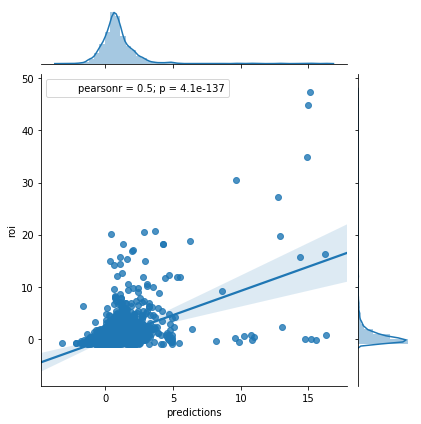

In [194]:
# predictions_df.plot(kind="scatter", x="predictions", y=target)
sns.jointplot("predictions", "roi", pred_df, kind="reg")

# pd.DataFrame([predictions_df])

# movie_df["predictions"]

/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


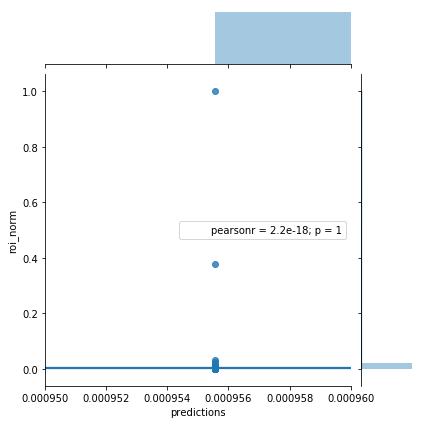

In [174]:
sns.jointplot("predictions", "roi", pred_df, kind="reg")
plt.xlim([0.00095, 0.00096])
# plt.ylim([-2, 1])
plt.show()

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(movie_df[predictor_columns], movie_df[target], train_size=0.80)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [115]:
linear = linear_model.Lasso(alpha=100)
linear.fit(X_train, Y_train)
preds = linear.predict(X_test)

# predictions_df = movie_df.assign(predictions=preds)
pred_df = pd.DataFrame([preds, Y_test]).T
pred_df.columns = ["predictions", "roi"]

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


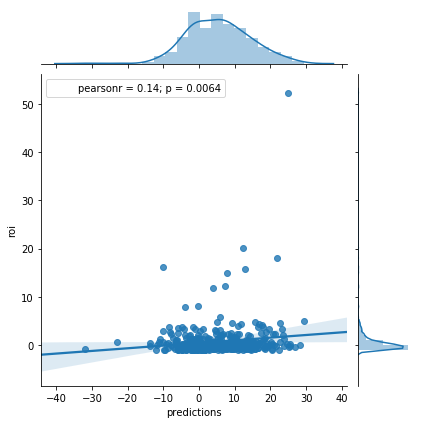

In [116]:
pred_df = pred_df[pred_df["predictions"] < 30]
sns.jointplot("predictions", "roi", pred_df, kind="reg")

In [17]:
all_actors_df = movie_df[['actor_1_name', 'actor_2_name', 'actor_3_name']]

actors_1 = movie_df['actor_1_name']
actors_2 = movie_df['actor_2_name']
actors_3 = movie_df['actor_3_name']

all_actors_series = pd.concat([actors_1, actors_2, actors_3])
unique_actors = all_actors_series.unique()
unique_actors_series = pd.Series(unique_actors)
print(unique_actors)


['CCH Pounder' 'Johnny Depp' 'Tom Hardy' ... 'Damian Jewan Lee'
 'Casey Gooden' 'Jon Gunn']


In [115]:
unique_actors_series.to_csv("unique_actors.csv")

In [ ]:
movie_df.to_csv("featurized_data.csv")

In [16]:
def get_roi(list_str):
    name_list = list(movie_df[list_str])
    people_roi_list = {}

    for i, name in enumerate(name_list):
        if name in people_roi_list:
            people_roi_list[name] += np.array([1, movie_roi_list[i], 0])
        else:
            people_roi_list[name] = np.array([1, movie_roi_list[i], 0])
    for name in people_roi_list:
        people_roi_list[name][2] = people_roi_list[name][1] / people_roi_list[name][0]
    return people_roi_list


# def insert_people_roi(list_str, args=()):
#     print(list_str)
#     print(people_roi_list)
#     people_roi = people_roi_list[list_str][2]
#     return people_roi

In [17]:
people_list = ["actor_1_name", "actor_2_name", "actor_3_name", "director_name"]
for people in people_list:
    roi_list = get_roi(people)
    roi_str = people[:-4] + "roi"
    movie_df[roi_str] = ""


    def insert_people_roi(list_str):
        # print(list_str)
        # print(roi_list)
        people_roi = roi_list[list_str][2]
        return people_roi


    movie_df[roi_str] = movie_df[people].apply(insert_people_roi)


# for name in roi_list:
#     num_names = roi_list[name][0]
#     print("%s appeared in %.0f movie(s), average roi is %.1f%%" % (name, num_names, 100*roi_list[name][2]))

In [18]:
movie_df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,is_color,roi,actor_1_roi,actor_2_roi,actor_3_roi,director_roi
0,Color,James Cameron,723.0,178.0,0,855.0,Joel David Moore,1000.0,760505847,Action|Adventure|Fantasy|Sci-Fi,...,936.0,7.9,1.78,33000,1,2.208885,2.208885,NaN,0.816311,2.208885
1,Color,Colin Trevorrow,644.0,124.0,365,1000.0,Judy Greer,3000.0,652177271,Action|Adventure|Sci-Fi|Thriller,...,2000.0,7.0,2.00,150000,1,3.347848,NaN,0.716646,3.347848,3.845786
2,Color,Joss Whedon,703.0,173.0,0,19000.0,Robert Downey Jr.,26000.0,623279547,Action|Adventure|Sci-Fi,...,21000.0,8.1,1.85,123000,1,1.833089,0.266775,1.500715,1.207303,1.033886
3,Color,Joss Whedon,703.0,173.0,0,19000.0,Robert Downey Jr.,26000.0,623279547,Action|Adventure|Sci-Fi,...,21000.0,8.1,1.85,123000,1,1.833089,0.266775,1.500715,1.207303,1.033886
4,Color,Christopher Nolan,645.0,152.0,22000,11000.0,Heath Ledger,23000.0,533316061,Action|Crime|Drama|Thriller,...,13000.0,9.0,2.35,37000,1,1.882790,0.195097,1.360985,1.125874,0.829781
5,Color,Joss Whedon,635.0,141.0,0,19000.0,Robert Downey Jr.,26000.0,458991599,Action|Adventure|Sci-Fi,...,21000.0,7.5,2.35,118000,1,0.835966,0.266775,1.500715,1.207303,1.033886
6,Color,Christopher Nolan,813.0,164.0,22000,23000.0,Christian Bale,27000.0,448130642,Action|Thriller,...,23000.0,8.5,2.35,164000,1,0.792523,-0.025077,1.138420,0.810539,0.829781
7,Color,Andrew Adamson,205.0,93.0,80,48.0,Jennifer Saunders,692.0,436471036,Adventure|Animation|Comedy|Family|Fantasy|Romance,...,309.0,7.2,1.85,0,1,1.909807,1.909807,1.909807,1.909807,NaN
8,Color,Francis Lawrence,502.0,146.0,508,523.0,Josh Hutcherson,34000.0,424645577,Adventure|Sci-Fi|Thriller,...,14000.0,7.6,2.35,82000,1,2.266504,2.365974,1.976245,0.869345,1.195547
9,Color,Gore Verbinski,313.0,151.0,563,1000.0,Orlando Bloom,40000.0,423032628,Action|Adventure|Fantasy,...,5000.0,7.3,2.35,5000,1,0.880145,0.254751,0.640142,0.697613,0.278937


In [ ]:
movie_df.to_csv("featurized_data.csv")